<Body>   
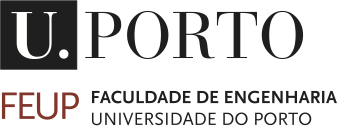   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Part 2: Control Design**



# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [9]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.


# **Identification**

* **Group: 7**
* **Name:** Alexandre Vilhena da Costa
* **Student Number:** up202005259

* **Name:** Francisco Pires da Silva
* **Student Number:** up202006190

* **Name:** Guilherme Ferreira Fernandes
* **Student Number:** 201905202
---


# An Autonomous Underwtare Vehicle (AUV) model in the vertical plan


<Body>   
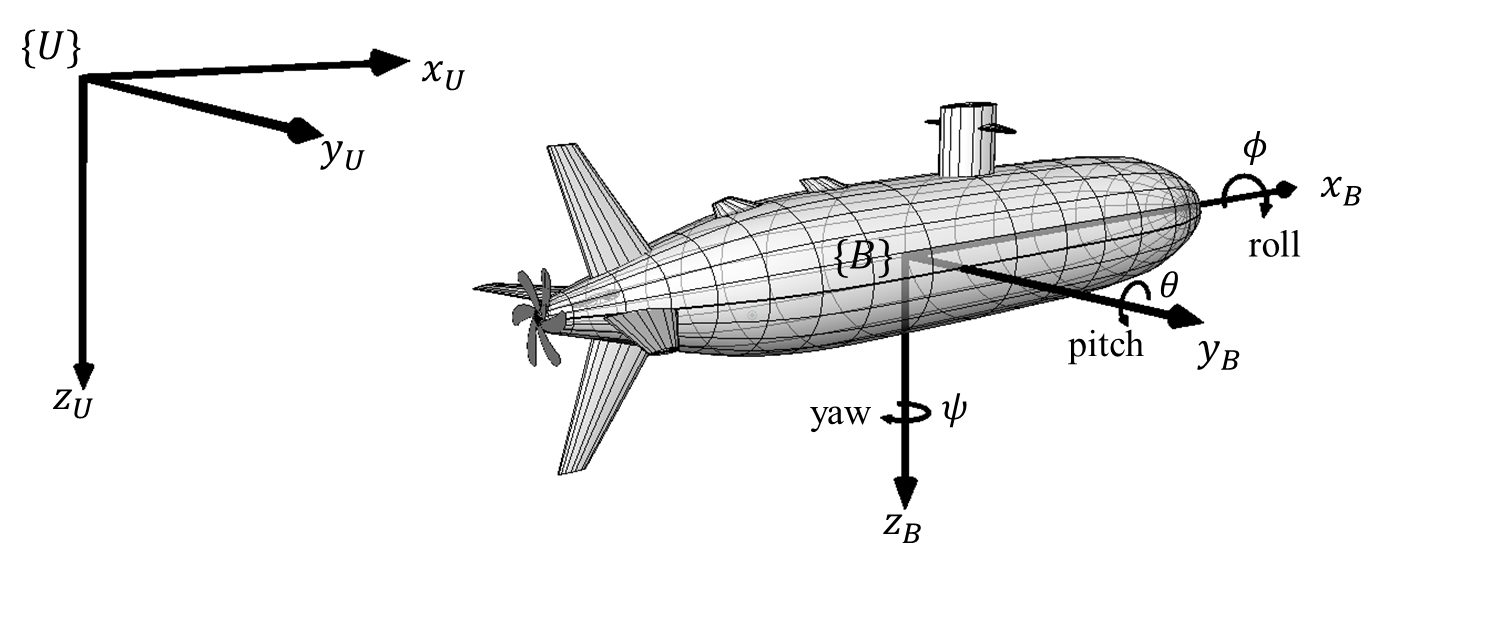

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{lightblue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


$\color{red}{1.1 : Answer}$



Considering the controller given by the equation :

\begin{equation}
 u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }} \nonumber
\end{equation}

We can obtain from the kinematic equations on the vertical plane:

\begin{equation}
\dot x = u\cos \theta  + w\sin \theta = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}\cos \theta  + w\sin \theta = v_d \nonumber
\end{equation}


\begin{equation}
\dot z =  - u\sin \theta  + w\cos \theta  = -\frac{{v_d - w\sin \theta }}{{\cos \theta }}  \sin \theta + w\cos \theta =  -v_d \tan \theta + w  \frac{1}{\cos\theta} \left( \sin^2(\theta)  + \cos^2(\theta) \right) = - v_d \tan\theta + \frac{1}{\cos\theta}w\nonumber
\end{equation}

\begin{equation}
\dot \theta  = q \nonumber
\end{equation}

Given the heave dynamics equation without actuation in the  $Z_B$ direction:

$$
{m_w}\dot w - {m_u}uq + d_w(w)w = 0
$$

The hydrodynamic damping term $d_w(w)$ can be expanded into its two components, linear and quadratic:

$$
d_w(w) =-Z_w-Z_{w|w|}|w|
$$

Substitute this into the heave dynamics equation we began with:

$$
{m_w}\dot w - {m_u}\frac{{{v_d} - w\sin \theta }}{{\cos \theta }}q + \left(-Z_w w - Z_{w|w|}|w|w\right) = 0
$$

Rearrange to isolate $\dot{w}$:

$$
\dot w = \frac{Z_w}{m_w} w + \frac{Z_{w|w|}}{m_w}|w|w + \frac{m_u}{m_w}\frac{{{v_d} - w\sin \theta }}{{\cos \theta }}q
$$

That is equivalent to :
$$
\dot w =d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
$$
When we consider :
$$
d_1 =  \frac{Z_w}{m_w} \\
$$
$$
d_2 = \frac{Z_{w|w|}}{m_w} \\
$$
$$
\bar m = \frac{m_u}{m_w} \\
$$

In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

$\color{red}{1.2 : Answer}$


Considering the system in state-space form, we have the following equations:

$$
\dot{x} =
\begin{bmatrix}
\dot{z} - \dot{z_d}\\
\dot{w} \\
\dot{\theta}
\end{bmatrix}
=\begin{bmatrix}
f_1(x) \\
f_2(x) \\
f_3(x)
\end{bmatrix}=
\begin{bmatrix}
-u \sin(\theta) + w \cos(\theta) \\
d_1 w + d_2 |w| w + \bar{m} q u  \\
q
\end{bmatrix}
$$
Considering u is given by the controler, we have :
$$
\dot{x} =

\begin{bmatrix}
-v_d \tan(\theta) + \frac{1}{\cos(\theta)}w \\
d_1 w + d_2 |w| w + \bar{m} q \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}  \\
q
\end{bmatrix}
$$


Linearization

$$
\dot{x} = A x + B q
$$



We can write the linearized system :
$$
A = \begin{bmatrix}
\frac{\partial f_1}{\partial (z-z_d)} & \frac{\partial f_1}{\partial w} & \frac{\partial f_1}{\partial \theta} \\
\frac{\partial f_2}{\partial (z-z_d)} & \frac{\partial f_2}{\partial w} & \frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial (z-z_d)} & \frac{\partial f_3}{\partial w} & \frac{\partial f_3}{\partial \theta} \\
\end{bmatrix}_{x=0, q=0}
= \begin{bmatrix}
0 & \frac{1}{\cos(\theta)} &  -\frac{vd}{\cos^2(\theta)} + \frac{\sin(\theta) w}{\cos^2(\theta)}  \\
0 & d_1 + d_2|w| - \tan(\theta) q \bar{m} & \frac{\bar{m} q v_d \sin(\theta)}{\cos^2(\theta)} - \frac{w q}{\cos^2(\theta)}\\
0 & 0 & 00
\end{bmatrix}_{x=0, q=0}
= \begin{bmatrix}
0 & 1 &  0  \\
0 & d_1 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
\frac{\partial f_1}{\partial q} \\
\frac{\partial f_2}{\partial q} \\
\frac{\partial f_3}{\partial q}
\end{bmatrix}_{x=0, u=0} =
\begin{bmatrix}
 -\sin(\theta) \\
2\bar m q \\
1
\end{bmatrix}_{x=x0, u=0} =
\begin{bmatrix}
0 \\ 0 \\ 1
\end{bmatrix}
$$

$$
C =
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
$$




**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

$$
\dot{x} =
\begin{bmatrix}
\dot{z} - \dot{z_d}\\
\dot{w} \\
\dot{\theta}
\end{bmatrix}=
\begin{bmatrix}
w \cos(\theta) \\
d_1 w + d_2 |w| w \\
q
\end{bmatrix}

$$
$$
A = \begin{bmatrix}
0 & \cos(\theta) &  - w\sin(\theta)  \\
0 & d_1 + d_2|w| & 0\\
0 & 0 & 0
\end{bmatrix}_{x=0, q=0}
= \begin{bmatrix}
0 & 1 &  -v_d  \\
0 & d_1 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

Calculating the eigen values:

$$
det(A - \lambda I) = 0\\
\lambda = \begin{bmatrix}
0 \\
-3 \\
0
\end{bmatrix}

$$

Since we have eigen values equal to zero, we can't conclude that it is stable.

**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

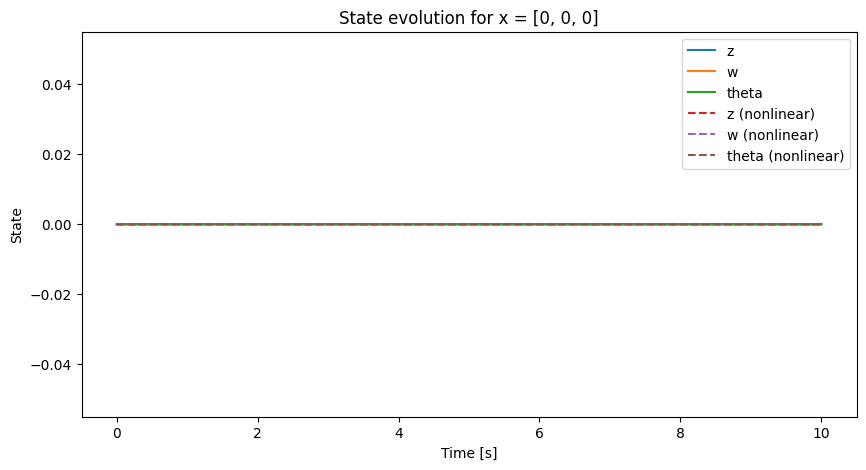

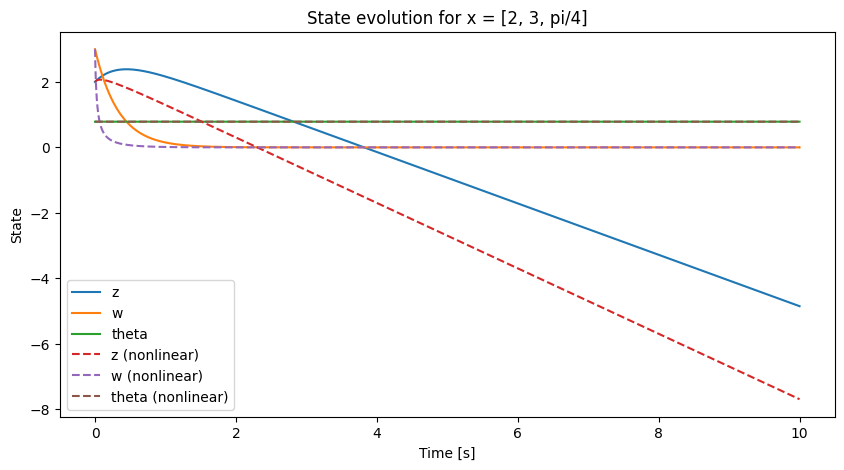

"\n\n\nplt.figure(figsize=(15, 5))\nplt.subplot(1, 2, 1)\nplt.plot(t, x_nonlinear3[:,0], label='z')\nplt.plot(t, x_nonlinear3[:,1], label='w')\nplt.plot(t, x_nonlinear3[:,2], label='theta')\nplt.legend()\nplt.xlabel('Time [s]')\nplt.ylabel('State')\nplt.title('NonLinear State evolution for x = [0, 5, 0]')\n\nplt.subplot(1, 2, 2)\nplt.plot(t, x_linear3[:,0], label='z')\nplt.plot(t, x_linear3[:,1], label='w')\nplt.plot(t, x_linear3[:,2], label='theta')\nplt.legend()\nplt.xlabel('Time [s]')\nplt.ylabel('State')\nplt.title('Linear State evolution for x = [0, 5, 0]')\nplt.show()\n\nplt.figure(figsize=(15, 5))\nplt.subplot(1, 2, 1)\nplt.plot(t, x_nonlinear4[:,0], label='z')\nplt.plot(t, x_nonlinear4[:,1], label='w')\nplt.plot(t, x_nonlinear4[:,2], label='theta')\nplt.legend()\nplt.xlabel('Time [s]')\nplt.ylabel('State')\nplt.title('NonLinear State evolution for x = [0, 0, 5]')\n\nplt.subplot(1, 2, 2)\nplt.plot(t, x_linear4[:,0], label='z')\nplt.plot(t, x_linear4[:,1], label='w')\nplt.plot(t,

In [10]:
import numpy as np
from spicy import integrate
import matplotlib.pyplot as plt

#parameters
v_d = 1
d1 = -3
d2 = -12
mbar = 0.9
z_d = 1
q = 0

#Nonlinear system

def nonlinear_system(x,t):

    z = x[0] + z_d
    w = x[1]
    theta = x[2]

    dzdt = -v_d * np.tan(theta) + w/np.cos(theta)
    dwdt = d1 * w + d2 * w * abs(w) + mbar * (v_d/np.cos(theta) - w * np.tan(theta)) * q
    dthetadt = q
    return [dzdt, dwdt, dthetadt]


#Linear system
A = np.array([[0, 1, -v_d], [0, d1, 0], [0, 0, 0]])
B = np.array([0, mbar, 1])

def linear_system(x, t):
    return np.dot(A,x) + B * q

#time vector
t = np.linspace(0, 10, 10000)

#initial conditions
x1 = [0, 0, 0]
x2 = [2, 3, np.pi/4]
x3 = [0, 20, 0]
x4 = [0, 0, 20]
x5 = [5, 10, 20]

x_nonlinear1 = integrate.odeint(nonlinear_system, x1, t)
x_linear1 = integrate.odeint(linear_system, x1, t)
x_nonlinear2 = integrate.odeint(nonlinear_system, x2, t)
x_linear2 = integrate.odeint(linear_system, x2, t)
x_nonlinear3 = integrate.odeint(nonlinear_system, x3, t)
x_linear3 = integrate.odeint(linear_system, x3, t)
x_nonlinear4 = integrate.odeint(nonlinear_system, x4, t)
x_linear4 = integrate.odeint(linear_system, x4, t)
x_nonlinear5 = integrate.odeint(nonlinear_system, x5, t)
x_linear5 = integrate.odeint(linear_system, x5, t)

### Plotting
##non linear and linear in the same plot but the non linear is dashed

plt.figure(figsize=(10, 5))

plt.plot(t, x_linear1[:,0], label='z')
plt.plot(t, x_linear1[:,1], label='w')
plt.plot(t, x_linear1[:,2], label='theta')

plt.plot(t, x_nonlinear1[:,0], label='z (nonlinear)', linestyle='--')
plt.plot(t, x_nonlinear1[:,1], label='w (nonlinear)', linestyle='--')
plt.plot(t, x_nonlinear1[:,2], label='theta (nonlinear)', linestyle='--')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('State evolution for x = [0, 0, 0]')


plt.figure(figsize=(10, 5))
plt.plot(t, x_linear2[:,0], label='z')
plt.plot(t, x_linear2[:,1], label='w')
plt.plot(t, x_linear2[:,2], label='theta')

plt.plot(t, x_nonlinear2[:,0], label='z (nonlinear)', linestyle='--')
plt.plot(t, x_nonlinear2[:,1], label='w (nonlinear)', linestyle='--')
plt.plot(t, x_nonlinear2[:,2], label='theta (nonlinear)', linestyle='--')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('State evolution for x = [2, 3, pi/4]')


plt.show()

"""


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x_nonlinear3[:,0], label='z')
plt.plot(t, x_nonlinear3[:,1], label='w')
plt.plot(t, x_nonlinear3[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('NonLinear State evolution for x = [0, 5, 0]')

plt.subplot(1, 2, 2)
plt.plot(t, x_linear3[:,0], label='z')
plt.plot(t, x_linear3[:,1], label='w')
plt.plot(t, x_linear3[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Linear State evolution for x = [0, 5, 0]')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x_nonlinear4[:,0], label='z')
plt.plot(t, x_nonlinear4[:,1], label='w')
plt.plot(t, x_nonlinear4[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('NonLinear State evolution for x = [0, 0, 5]')

plt.subplot(1, 2, 2)
plt.plot(t, x_linear4[:,0], label='z')
plt.plot(t, x_linear4[:,1], label='w')
plt.plot(t, x_linear4[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Linear State evolution for x = [0, 0, 5]')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x_nonlinear5[:,0], label='z')
plt.plot(t, x_nonlinear5[:,1], label='w')
plt.plot(t, x_nonlinear5[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('NonLinear State evolution for x = [0, 5, 5]')

plt.subplot(1, 2, 2)
plt.plot(t, x_linear5[:,0], label='z')
plt.plot(t, x_linear5[:,1], label='w')
plt.plot(t, x_linear5[:,2], label='theta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Linear State evolution for x = [0, 5, 5]')
plt.show()
"""




**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


$\color{red}{Answer:}$

Knowing that $\tilde{z} = z - z_d$, $\dot{\tilde{z}} = \dot{z} = -v_d \cdot tan(\theta) + \frac{w}{cos(\theta)}$.

$$\dot{V}(\tilde{z},\theta) = \frac{k_1}{v_d} \tilde{z} \dot{\tilde{z}} + tan(\theta)\dot{\theta} = - k_1\tilde{z}tan(\theta) + tan(\theta)\cdot(k_1\tilde{z} - k_2\theta)\\ = -k_2 \cdot \theta \cdot tan(\theta)$$

Testing for the origin:

$$V(0,0) = \frac{k_1}{2v_d}\cdot 0 + 0 = 0$$

$$\dot{V}(0,0) = -k_2 \cdot 0 \cdot tan(0) = 0$$

To be asymptotically stable, $\dot{V} < 0$, for $(\tilde{z}, \theta) \neq (0,0)$:

Considering $\theta \in \left[ -\frac{\pi}{2}, \frac{\pi}{2} \right]$, for $\theta \in \left ] 0, \frac{\pi}{2} \right]$, $tan(\theta) > 0$ and for $\theta \in \left[- \frac{\pi}{2}, 0 \right[$, $tan(\theta) < 0$, which means that $\theta \cdot tan(\theta) > 0$ for $\theta \neq 0$.

Since $k_2$ is a positive constant, $-k_2 \cdot \theta \cdot tan(\theta)$ is always negative and it is zero for $\theta = 0$, which means that we can conlude that it is $\textbf{asymptotically stable}$!


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

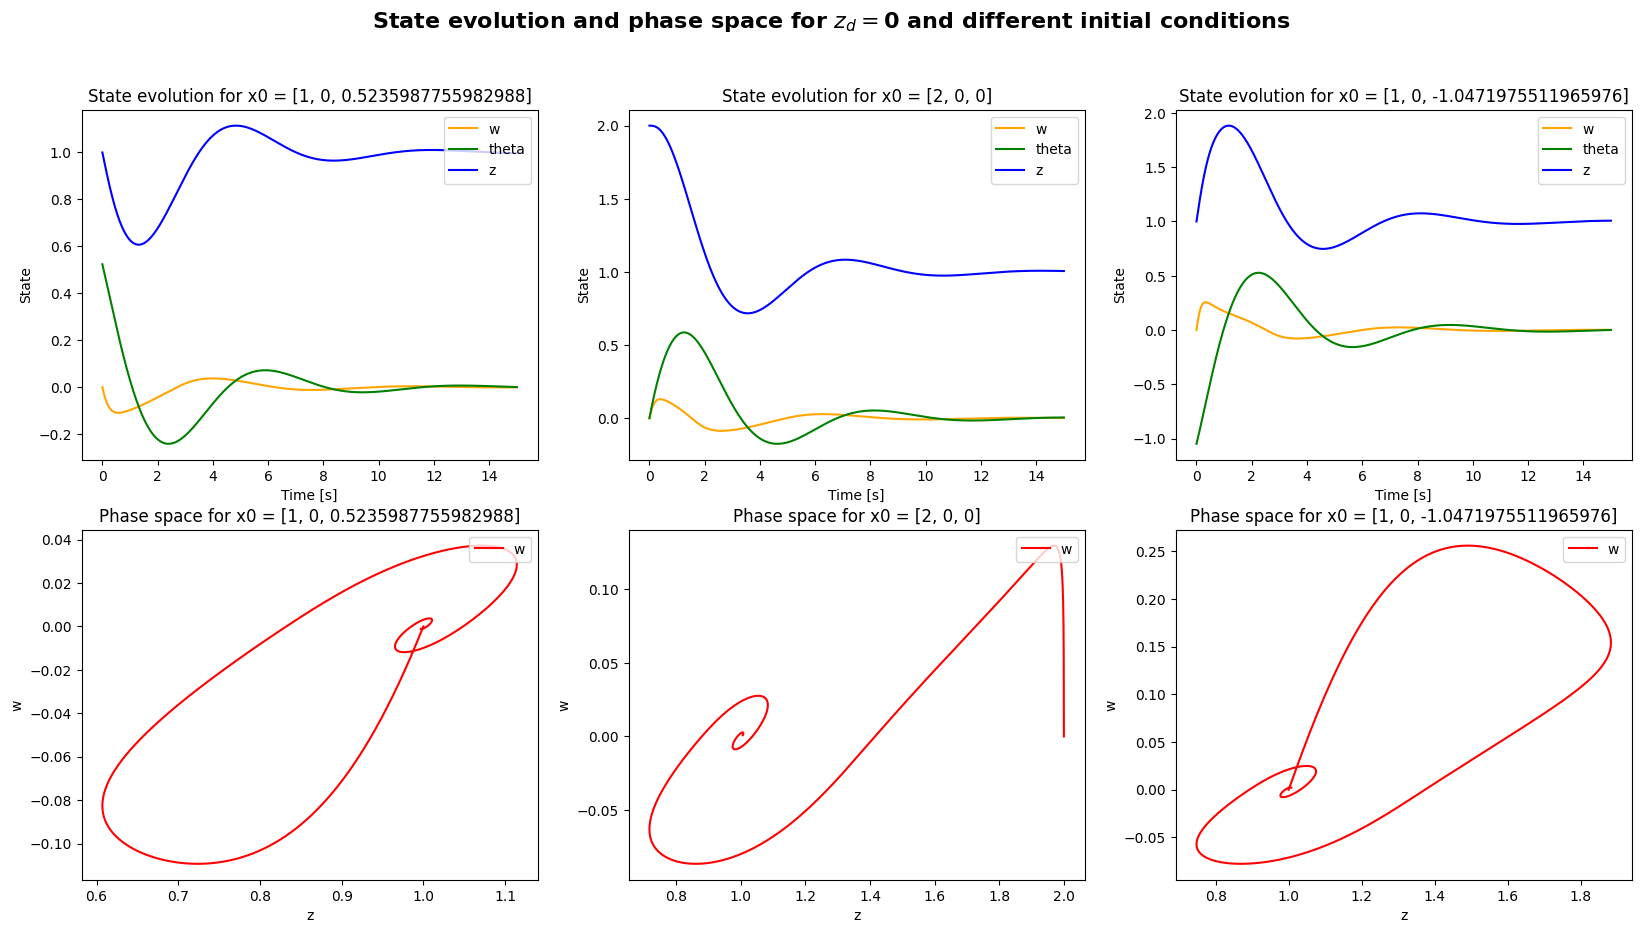

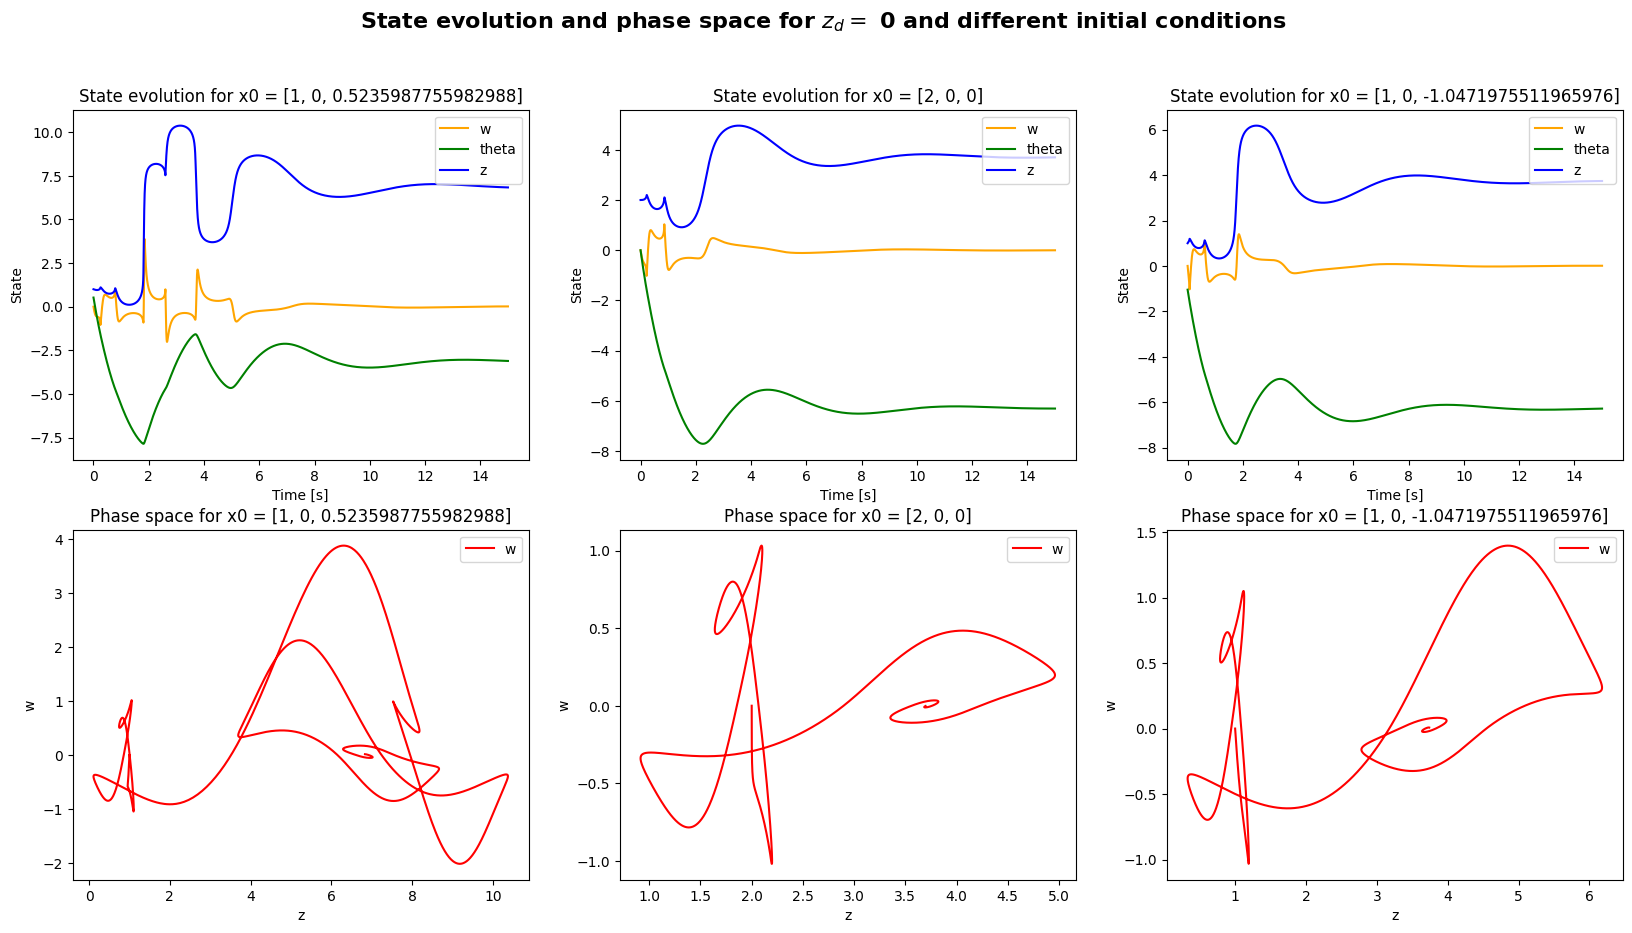

In [23]:
# Variables
k1, k2 = 1, 1
t = np.linspace(0, 15, 20000)
#(z, w, theta), w = 0 beacuse of what it is said in the question
x0_1 = [1, 0, np.pi/6]
x0_2 = [2, 0, 0]
x0_3 = [1, 0, -np.pi/3]
zd = 0

# Nonlinear system

def nonlinear_system(x,t):

    z = x[0] - z_d
    w = x[1]
    theta = x[2]
    q = k1 * z - k2 * theta
    
    dzdt = -v_d * np.tan(theta) + w / np.cos(theta)
    dwdt = d1 * w + d2 * w * abs(w) + mbar * (v_d / np.cos(theta) - w * np.tan(theta)) * q
    dthetadt = q
    
    return [dzdt, dwdt, dthetadt]

# plot the time results and phase space for different initial conditions in 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('State evolution and phase space for $z_d = $' + str(z_d) + ' and different initial conditions', fontsize=16, fontweight='bold')

# Initial Conditions
x0 = [x0_1, x0_2, x0_3]

for i in range(3):
	x_nonlinear = integrate.odeint(nonlinear_system, x0[i], t)
	axs[0, i].plot(t, x_nonlinear[:,1], color='orange', label='w')
	axs[0, i].plot(t, x_nonlinear[:,2], color='green', label='theta')
	axs[0, i].plot(t, x_nonlinear[:,0], color='blue', label='z')
	axs[0, i].set_xlabel('Time [s]')
	axs[0, i].set_ylabel('State')
	axs[0, i].set_title('State evolution for x0 = ' + str(x0[i]))
	axs[0, i].legend(loc='upper right')

for i in range(3):
	x_nonlinear = integrate.odeint(nonlinear_system, x0[i], t)
	axs[1, i].plot(x_nonlinear[:,0], x_nonlinear[:,1], color='red', label='w')
	axs[1, i].set_xlabel('z')
	axs[1, i].set_ylabel('w')
	axs[1, i].set_title('Phase space for x0 = ' + str(x0[i]))
	axs[1, i].legend(loc='upper right')

plt.show()


# Variables
z_d = 10
t = np.linspace(0, 15, 20000)
x0_1 = [1, 0, np.pi/6]
x0_2 = [2, 0, 0]
x0_3 = [1, 0, -np.pi/3]

# plot the time results and phase space for different initial conditions in 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('State evolution and phase space for $z_d =$ ' + str(z_d) + ' and different initial conditions', fontsize=16, fontweight='bold')

# Initial Conditions
x0 = [x0_1, x0_2, x0_3]

for i in range(3):
	x_nonlinear = integrate.odeint(nonlinear_system, x0[i], t)
	axs[0, i].plot(t, x_nonlinear[:,1], color='orange', label='w')
	axs[0, i].plot(t, x_nonlinear[:,2], color='green', label='theta')
	axs[0, i].plot(t, x_nonlinear[:,0], color='blue', label='z')
	axs[0, i].set_xlabel('Time [s]')
	axs[0, i].set_ylabel('State')
	axs[0, i].set_title('State evolution for x0 = ' + str(x0[i]))
	axs[0, i].legend(loc='upper right')

for i in range(3):
	x_nonlinear = integrate.odeint(nonlinear_system, x0[i], t)
	axs[1, i].plot(x_nonlinear[:,0], x_nonlinear[:,1], color='red', label='w')
	axs[1, i].set_xlabel('z')
	axs[1, i].set_ylabel('w')
	axs[1, i].set_title('Phase space for x0 = ' + str(x0[i]))
	axs[1, i].legend(loc='upper right')

plt.show()

**1.7**
Consider now the $\color{lightblue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

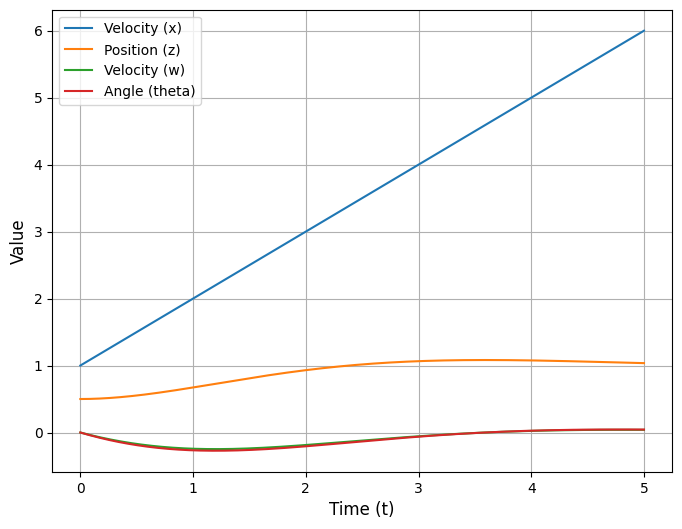

In [24]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
vd = 1
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
Zd = 1

def Sys_f(x,t):
  x_ = x[0]
  z = x[1]
  w = x[2]
  theta = x[3]

  dx_dt = vd
  dzdt = -vd*np.tan(theta)
  dwdt =  m*(vd/np.cos(theta))* ( k1 * z - k2 * theta)
  dthetadt =  ( k1 * z - k2 * theta)

  return np.array([dx_dt,dzdt,dwdt,dthetadt])


t_end = 5
t = np.linspace(0,t_end,1000)

x0 = np.transpose(np.array([0,-0.5, 0, 0]))
x = integrate.odeint(Sys_f, x0, t ,full_output=False)


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, x[:, 0]+Zd, label='Velocity (x)')
ax.plot(t, x[:, 1]+Zd, label='Position (z)')
ax.plot(t, x[:, 2], label='Velocity (w)')
ax.plot(t, x[:, 3], label='Angle (theta)')
ax.set_xlabel('Time (t)', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend()
ax.grid()
plt.show()


# **Part 2: Control Design**



**2.1**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, where $z_d$ is a constant desired depth.
Assuming $q$ as input and $w=0$, design a **Backstepping** Lyapunov based feedback law such that $z(t)$ converges to $z_d$ as $t\to\infty$ and the tracking error system at the origin is AS.

To this end, in the first step of the methodology assume that the **virtual control signal** is $\tan(\theta)$ (and not $\theta$).


\begin{gather*}
\\
V_1=\frac{1}{2v_{d}}\cdot \tilde{z}^{2}\\
\dot{V_1} = \frac{1}{v_d}\tilde{z} \cdot \dot{\tilde{z}} = \tilde{z}(-tan(\theta))\\

\end{gather*}

If we consider a virtual control signal $y_2$ as following, $V_1$ becomes negative definite


\begin{gather*}

y_2 = tan(\theta) - k_1\tilde{z}\\
tan(\theta) = y_2 + k_1\tilde{z}\\
\dot{y_2} = tan^2(\theta) - k_1 \dot{\tilde{z}}= \frac{1}{cos^2(\theta)}\cdot q + k_1 v_d tan(\theta) \\
V_1=\frac{1}{2v_{d}}\cdot \tilde{z}^{2}\\
\dot{V_1} = \tilde{z}(-tan(\theta)) = -k_1\tilde{z}^2\\
\end{gather*}

Now let's consider the Augmented Lyapunov function $V_2$:

\begin{gather*}
V_2 = V_1 + \frac{1}{2}y_2^2\\
\dot{V_2} = \dot{V_1} + y_2\dot{y_2}\\
\dot{V_2} = -\tilde{z}^2 - y_2 ( \tilde{z} - \frac{1}{cos^2(\theta)}q - k_1 v_d tan(\theta))\\
\end{gather*}
We can make q = $(\tilde{z} - k_2 y_2 - k_1 v_d tan(\theta))cos^2(\theta)$
And $\dot{V_2}$ becomes $\dot{V_2} = -k_1\tilde{z}^2 - k_2y_2^2$, which is negative definite.

We obtain a control signal

\begin{gather*}

q = (\tilde{z} - k_2y_2 - k_1v_dtan(\theta))cos^2(\theta) \\ q= (\tilde{z} - k_2 (tan(\theta) - k_1 \tilde{z}) - k_1v_dtan(\theta) )cos^2(\theta) 
\end{gather*}


**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $z(t)$, the tracking error $\tilde z(t)$, the pitch angle $\theta$ and the input signal $q$.

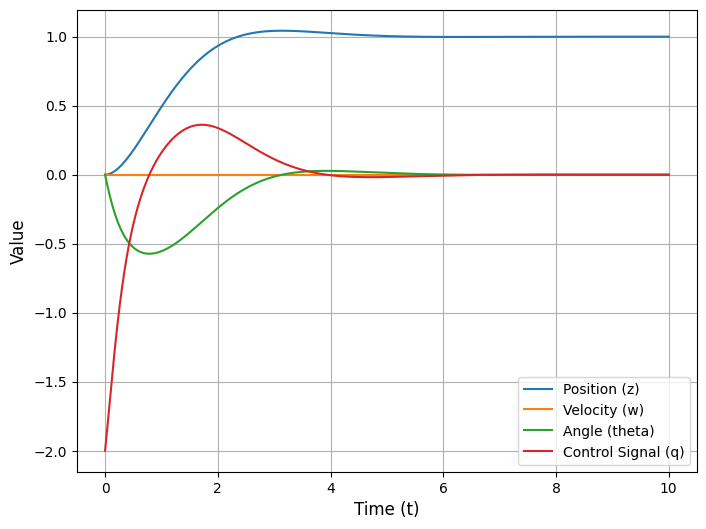

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
vd = 1  # desired velocity
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
Zd = 1  # desired depth

def Sys_f(x, t):
    z = x[0] - Zd
    w = x[1]
    theta = x[2]
    
    dzdt = -vd * np.tan(theta)
    dwdt = 0
    dthetadt = (z - k2 * (np.tan(theta) - z * k1) - k1 * vd * np.tan(theta)) * (np.cos(theta)**2)
    
    return np.array([dzdt, dwdt, dthetadt])

def calc_q(x):
    z = x[0] - Zd
    theta = x[2]
    q = (z - k2 * (np.tan(theta) - z * k1) - k1 * vd * np.tan(theta)) * (np.cos(theta)**2)
    return q

t_end = 10
t = np.linspace(0, t_end, 1000)
x0 = np.array([0, 0, 0])

x = integrate.odeint(Sys_f, x0, t, full_output=False)

q = np.array([calc_q(state) for state in x])

# Plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, x[:, 0], label='Position (z)')
ax.plot(t, x[:, 1], label='Velocity (w)')
ax.plot(t, x[:, 2], label='Angle (theta)')
ax.plot(t, q, label='Control Signal (q)')
ax.set_xlabel('Time (t)', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend()
ax.grid()
plt.show()

**2.3**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the backstepping control law.
Plot the **time-evolution** of the state  for different initial conditions.


**2.4**
For the same conditions stated in **2.1**, design a **sliding mode controller** and confirm the results through simulation.
For the sliding surface use
$$
s = \dot{\tilde z} + \lambda \tilde z, \quad \lambda>0
$$




Considering the sliding surface $s = \dot{\tilde z} + \lambda \tilde z$, the control signal $q$ can be obtained as follows:

\begin{gather*}
s = \dot{\tilde z} + \lambda \tilde z\\
\tilde z = z - z_d\\
\dot{\tilde z} = \dot z = -v_d tan(\theta)  \\

s = \dot{\tilde{z}}+\lambda \cdot \tilde{z} = -v_d \cdot tan(\theta) + \lambda \cdot \tilde{z}\\
\dot{s} = -v_d \cdot \frac{1}{cos^2(\theta)} \cdot q - \lambda \cdot v_d \cdot tan(\theta)\\
\\
\end{gather*}
Let's consider the Lyapunov function V on the sliding surface:

\begin{gather*}
V=\frac{1}{2}s^{2}\\

\dot{V}= s\cdot \dot{s}= s \cdot (-v_d \cdot \frac{1}{cos^2(\theta)} \cdot q - \lambda \cdot v_d \cdot tan(\theta))

\end{gather*}

To make $\dot{V}$ negative definite, we can consider the control signal $q$ as follows, bounding the nonlinear term:
\\

\begin{gather*}
\left| \frac{-\lambda\cdot v_{d}\cdot \tan(\theta)}{\frac{-v_{d}}{\cos^{2}(\theta)}} \right| = \left| \lambda\cdot \sin(\theta)\cdot \cos(\theta) \right|\leq \lambda \cdot 0.5\\
\\
\dot{V}=s\cdot \dot{s}\leq -\beta _{0}\cdot \left| s\right|\\
\Leftrightarrow \dot{s}\cdot \frac{s}{\left| s\right|} \leq  -\beta _{0}\\
\Leftrightarrow \dot{s}\cdot \operatorname{sign}(s)\leq  -\beta _{0}\\
\\

\end{gather*}

However, the sliding mode control suffers from chattering. To mitigate this effect, we can use a saturation function on the control signal $q$.

\begin{gather*}
q = -\beta(x) \cdot \operatorname{sat}(\frac{s}{\epsilon})\\


\end{gather*}




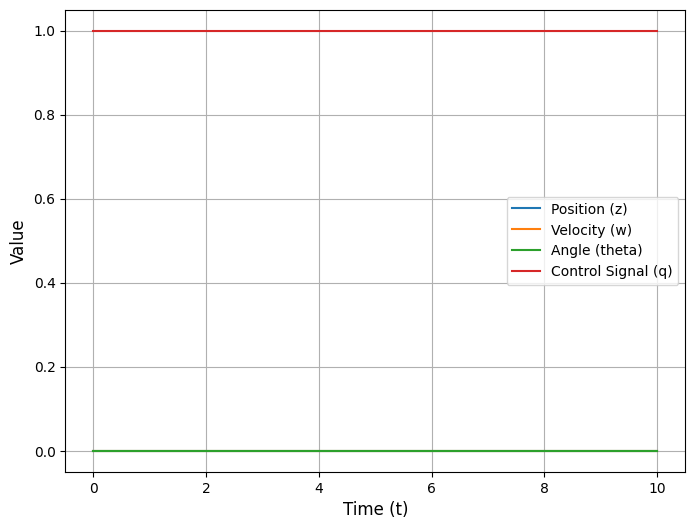

In [16]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
vd = 1
d1 = -3
d2 = -12
m = 0.9
Zd = 1 

lambda1 = 1
epsilon = 0.1


def Sys_f(x, t):
    z = x[0] - Zd
    w = x[1]
    theta = x[2]
    
    dzdt = -vd * np.tan(theta) 
    dwdt = 0

    s = dzdt + lambda1 * z
    beta_x = lambda1 * 0.5  - 0.5
    q = -beta_x * sat(s / epsilon)
    
    dthetadt = q

    return np.array([dzdt, dwdt, dthetadt])

def sat(y):
    if y > 1:
        return 1
    elif y < -1:
        return -1
    else:
        return y
    

t_end = 10
t = np.linspace(0, t_end, 1000)
x0 = np.array([0, 0, 0])

x = integrate.odeint(Sys_f, x0, t, full_output=False)

s = np.array([-vd * np.tan(state[2]) + lambda1 * (state[0] - Zd) for state in x])
beta_x = lambda1 * 0.5 + 0.5
q = -beta_x * np.array([sat(si / epsilon) for si in s])

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, x[:, 0], label='Position (z)')
ax.plot(t, x[:, 1], label='Velocity (w)')
ax.plot(t, x[:, 2], label='Angle (theta)')
ax.plot(t, q, label='Control Signal (q)')
ax.set_xlabel('Time (t)', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend()
ax.grid()
plt.show()


**2.5 (Extra)**
For the linearized system in **1.2**, design a **LQR controller** and confirm the results through simulation.



**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).